# Tema 1: Ejercicios con tensores

In [ ]:
import torch

## 1.1. Introducción a tensores

* Son unidades fundamentales de datos utilizadas para el cálculo en Pytorch y otras librerías de Deep Learning, como TensorFlow.

* Son contendores de datos, donde los valores están organizados en un espacio multidimensional.


### Crear un tensor de un solo valor, es decir escalar.

In [ ]:
tensor_value = torch.tensor(5)

In [ ]:
tensor_value

tensor(5)

### Crear un tensor de una lista

In [ ]:
tensor_vector = torch.tensor([1,2,3])

In [ ]:
tensor_vector

tensor([1, 2, 3])

### Crear un tensor de tipo float

In [ ]:
float_tensor = torch.tensor([[1.123456, 2.987654], [3.456789, 4.654321]], dtype=torch.float32)

print("FloatTensor:\n", float_tensor)
print("Tipo de dato:", float_tensor.dtype)

FloatTensor:
 tensor([[1.1235, 2.9877],
        [3.4568, 4.6543]])
Tipo de dato: torch.float32


### Ver las propiedades de los tensores

Del tensor ***tensor_value***

In [ ]:
print(f"Shape: {tensor_value.shape}")
print(f"Size: {tensor_value.size()}")
print(f"Type: {tensor_value.dtype}")
print(f"# dimensiones: {tensor_value.ndimension()}")
print(f"# elementos: {tensor_value.numel()}")
print(f"Dispositivo: {tensor_value.device}")

Shape: torch.Size([])
Size: torch.Size([])
Type: torch.int64
# dimensiones: 0
# elementos: 1
Dispositivo: cpu


Del tensor ***float_tensor***

In [ ]:
print(f"Shape: {float_tensor.shape}")
print(f"Size: {float_tensor.size()}")
print(f"# dimensiones: {float_tensor.ndimension()}")
print(f"# elementos: {float_tensor.numel()}")
print(f"Dispositivo: {float_tensor.device}")

Shape: torch.Size([2, 2])
Size: torch.Size([2, 2])
# dimensiones: 2
# elementos: 4
Dispositivo: cpu


## 1.2. Operaciones básicas con tensores

###Operaciones básicas: ***suma***

In [ ]:
tensor1 = torch.tensor([1,3,5])
tensor2 = torch.tensor([2,4,6])
print(f"Tensor 1: {tensor1}")
print(f"Tensor 2: {tensor2}")

Tensor 1: tensor([1, 3, 5])
Tensor 2: tensor([2, 4, 6])


In [ ]:
sum1 = tensor1 + tensor2
print(f"Tensor resultante: {sum1}")

Tensor resultante: tensor([ 3,  7, 11])


In [ ]:
sum1 = torch.add(tensor1,tensor2)
print(f"Tensor resultante: {sum1}")

Tensor resultante: tensor([ 3,  7, 11])


###Operaciones básicas: ***producto matricial***

Ejemplo de dos tensores de 1D

In [ ]:
x = torch.rand(4)  # Vector de tamaño 4
y = torch.rand(4)  # Otro vector de tamaño 4

print(f"Matriz x: {x}")
print(f"Matriz y: {y}")

# Producto punto
z = x @ y

print(f"Matriz resultante: {z}")
print(f"Dimensiones del resultado: {z.shape}")

Matriz x: tensor([0.4906, 0.2349, 0.2492, 0.0379])
Matriz y: tensor([0.8101, 0.7089, 0.8143, 0.9645])
Matriz resultante: 0.8034645318984985
Dimensiones del resultado: torch.Size([])


Ejemplo con dimensiones incompatibles

In [ ]:
A = torch.rand(3, 4)
B = torch.rand(5, 3)
print(f"Matriz A: {A}")
print(f"Matriz B: {B}")

Matriz A: tensor([[0.6633, 0.6994, 0.5612, 0.2668],
        [0.2074, 0.9935, 0.1469, 0.9885],
        [0.1545, 0.5652, 0.8712, 0.0166]])
Matriz B: tensor([[0.3423, 0.7803, 0.4792],
        [0.3316, 0.2314, 0.5969],
        [0.0478, 0.2330, 0.7802],
        [0.3552, 0.6707, 0.8556],
        [0.6358, 0.5543, 0.5788]])


In [ ]:
C = A @ B
print(f"Matriz resultante: {C}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 5x3)

Ejemplo de producto matricial con dimensiones compatibles

In [ ]:
B = torch.rand(4, 5)
print(f"Matriz A: {A}")
print(f"Matriz B: {B}")

Matriz A: tensor([[0.6633, 0.6994, 0.5612, 0.2668],
        [0.2074, 0.9935, 0.1469, 0.9885],
        [0.1545, 0.5652, 0.8712, 0.0166]])
Matriz B: tensor([[0.6522, 0.2273, 0.3825, 0.0429, 0.8740],
        [0.0142, 0.1222, 0.0693, 0.6853, 0.7395],
        [0.9661, 0.4900, 0.6844, 0.1830, 0.9636],
        [0.6897, 0.4319, 0.0228, 0.3591, 0.6149]])


In [ ]:
C = A @ B
print(f"Matriz resultante: {C}")
print(f"Dimensiones del resultado: {C.shape}")

Matriz resultante: tensor([[1.1687, 0.6264, 0.6924, 0.7063, 1.8018],
        [0.9730, 0.6675, 0.2713, 1.0717, 1.6653],
        [0.9619, 0.5382, 0.6949, 0.5594, 1.4027]])
Dimensiones del resultado: torch.Size([3, 5])


## 1.3. Manipulación de tensores

### Comparación de View y Reshape

In [ ]:
test = torch.rand([10,10])
print(f"¿Es contiguo? {test.is_contiguous()}")

test = test[:8,1:9]
print(f"¿Es contiguo? {test.is_contiguous()}")

¿Es contiguo? True
¿Es contiguo? False


In [ ]:
try:
    test_view = test.view(-1)
    print("\nTensor reconfigurado con view (no contiguo):")
    print(test_view)
except RuntimeError as e:
    print("\nError al usar view con un tensor no contiguo:")
    print(e)


Error al usar view con un tensor no contiguo:
view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.


Utilizando ***Reshape***

In [ ]:
reshaped_tensor = test.reshape(1,64)

print(f"Tensor original {test.shape}")
print(f"Tensor resultante {reshaped_tensor.shape}")

Tensor original torch.Size([8, 8])
Tensor resultante torch.Size([1, 64])


Utilizando ***contiguous().view***

In [ ]:
try:
    test_view = test.contiguous().view(-1)
    print("\nTensor reconfigurado con view (no contiguo):")
    print(test_view)
except RuntimeError as e:
    print("\nError al usar view con un tensor no contiguo:")
    print(e)


Tensor reconfigurado con view (no contiguo):
tensor([0.3892, 0.9591, 0.7460, 0.1524, 0.4824, 0.1171, 0.5213, 0.2930, 0.9070,
        0.7695, 0.0188, 0.8948, 0.1228, 0.3824, 0.0502, 0.5420, 0.9789, 0.1512,
        0.3847, 0.4735, 0.1451, 0.7902, 0.0293, 0.9301, 0.7983, 0.8486, 0.7636,
        0.2450, 0.0837, 0.6613, 0.6240, 0.8657, 0.8213, 0.8618, 0.6572, 0.2878,
        0.3064, 0.2275, 0.8634, 0.5049, 0.7653, 0.2444, 0.4669, 0.0781, 0.4532,
        0.4564, 0.3586, 0.9499, 0.3372, 0.1022, 0.3963, 0.6970, 0.7030, 0.9862,
        0.9905, 0.2205, 0.6002, 0.7134, 0.5004, 0.0174, 0.5813, 0.8259, 0.8488,
        0.4542])


## 1.4. Operaciones avanzadas con tensores

### Producto punto

In [ ]:
tensor1 = torch.tensor([2.0, 3.0, 4.0])
tensor2 = torch.tensor([1.0, 0.5, 2.0])

In [ ]:
dot_product = torch.dot(tensor1, tensor2)


print(f"Tensor 1: {tensor1}")
print(f"Tensor 2: {tensor2}")
print(f"\nTensor resultante: {dot_product}")


Tensor 1: tensor([2., 3., 4.])
Tensor 2: tensor([1.0000, 0.5000, 2.0000])

Tensor resultante: 11.5


### Filtrado utilizando ***torch.where***

In [ ]:
identity_matrix = torch.eye(3)
print(f"Matriz identidad 3x3:\n {identity_matrix}")


tensor1 = torch.randint(10, 21, (3, 3))
print(f"Tensor 1:\n {tensor1}")


tensor2 = (torch.rand((3, 3)))
print(f"Tensor 2:\n {tensor2}")


Matriz identidad 3x3:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Tensor 1:
 tensor([[20, 19, 19],
        [15, 17, 20],
        [20, 11, 11]])
Tensor 2:
 tensor([[0.8320, 0.6831, 0.3323],
        [0.7244, 0.7661, 0.3173],
        [0.2243, 0.9928, 0.0531]])


Los valores menores que 1 se cambiarán por los valores del tensor2 y el resto de valores se sustituirán por tensor1

In [ ]:
result = torch.where(identity_matrix <1, tensor2, tensor1)
print(f"Matriz resultante: \n {result}")

Matriz resultante: 
 tensor([[20.0000,  0.6831,  0.3323],
        [ 0.7244, 17.0000,  0.3173],
        [ 0.2243,  0.9928, 11.0000]])


Los valores menores que 1 se cambiarán por 2 y el resto de valores se sustituirán por 0

In [ ]:
result = torch.where(identity_matrix <1, 2, 0)
print(f"Matriz resultante: \n {result}")

Matriz resultante: 
 tensor([[0, 2, 2],
        [2, 0, 2],
        [2, 2, 0]])


## 1.5. Trabajar en GPU

### Comprobar si estamos trabajando sobre GPU y si no es así cambiar el entorno de trabajo.

In [ ]:
torch.cuda.is_available()

False

**Para cambiar el entorno de ejección tenemos que:**


1.   Ir a entornos de ejecución
2.   Cambiar tipo de entorno de ejecución
3.   Seleccionar GPU


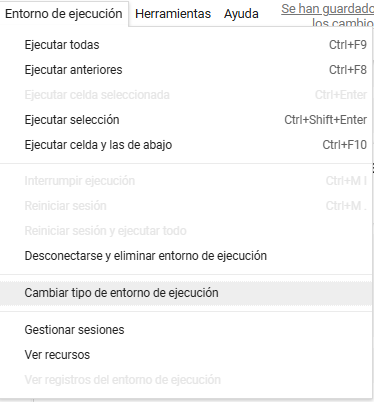

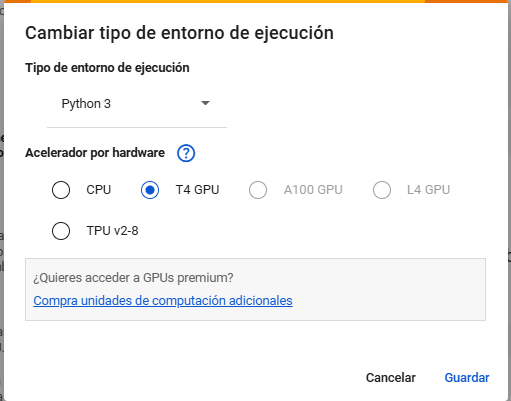

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

### Seleccionar la GPU, si está disponible

In [ ]:
if torch.cuda.is_available():
 dev = "cuda:0"
else:
 dev = "cpu"

In [ ]:
print(dev)

cuda:0


### Mostrar las propiedades y la memoria reservada y en uso de la GPU

In [ ]:
props = torch.cuda.get_device_properties(dev)

In [ ]:
props

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=a1759d1d-5897-2049-7b06-74e95eb26e07, L2_cache_size=4MB)

In [ ]:
print(f"Total Memory: {torch.cuda.get_device_properties(dev).total_memory}")
print(f"Used memory: {torch.cuda.memory_allocated()}")
print(f"Reserved memory: {torch.cuda.memory_reserved()}")

Total Memory: 15835660288
Used memory: 0
Reserved memory: 0


### Crear tensores en GPU

In [ ]:
tensor_gpu = torch.tensor([1.0, 2.0, 3.0], device=dev)
print(f"Tensor en GPU: \n {tensor_gpu}")

Tensor en GPU: 
 tensor([1., 2., 3.], device='cuda:0')


### Pasar un tensor de la CPU a la GPU

In [ ]:
tensor_cpu = torch.tensor([4.0, 5.0, 6.0])
print(f"Tensor en CPU: \n {tensor_cpu}")

Tensor en CPU: 
 tensor([4., 5., 6.])


In [ ]:
tensor_gpu2 = tensor_cpu.to(dev)
print(f"Tensor pasado a GPU: \n {tensor_gpu2}")

Tensor pasado a GPU: 
 tensor([4., 5., 6.], device='cuda:0')
